In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-cheating-detection-cccd/creditcard.csv


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Exploratory Data Analysis**

In [46]:
data=pd.read_csv("/kaggle/input/credit-card-cheating-detection-cccd/creditcard.csv")

In [47]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [48]:
data.shape

(284807, 31)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [50]:
nan_count = np.sum(np.isnan(data))
print(nan_count)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [51]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [52]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,0.000017,0.000008,0.014970,0.000023,0.000022,-0.000016,0.000029,0.000003,0.004311,...,-3.405795e-13,-5.723161e-13,-9.725862e-13,1.464149e-12,-6.987098e-13,-5.617860e-13,3.332081e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958679,1.651295,8.073856,1.415859,1.380234,1.332244,1.237076,1.194354,2.538010,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-0.920327,-0.598532,-0.890365,-0.848611,-0.691568,-0.768290,-0.554011,-0.208630,-0.643068,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,0.018027,0.065467,0.179832,-0.019816,-0.054314,-0.274159,0.040104,0.022358,-0.051331,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315632,0.803724,1.027212,0.743355,0.611926,0.398487,0.570450,0.327349,0.597139,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930,22.057729,4232.000000,16.875344,34.801666,73.301626,120.589494,20.007208,1221.000000,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [53]:
features = data.columns[1:29] 
feature_val=data[1:29]
print(features)
feature_val.head()

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


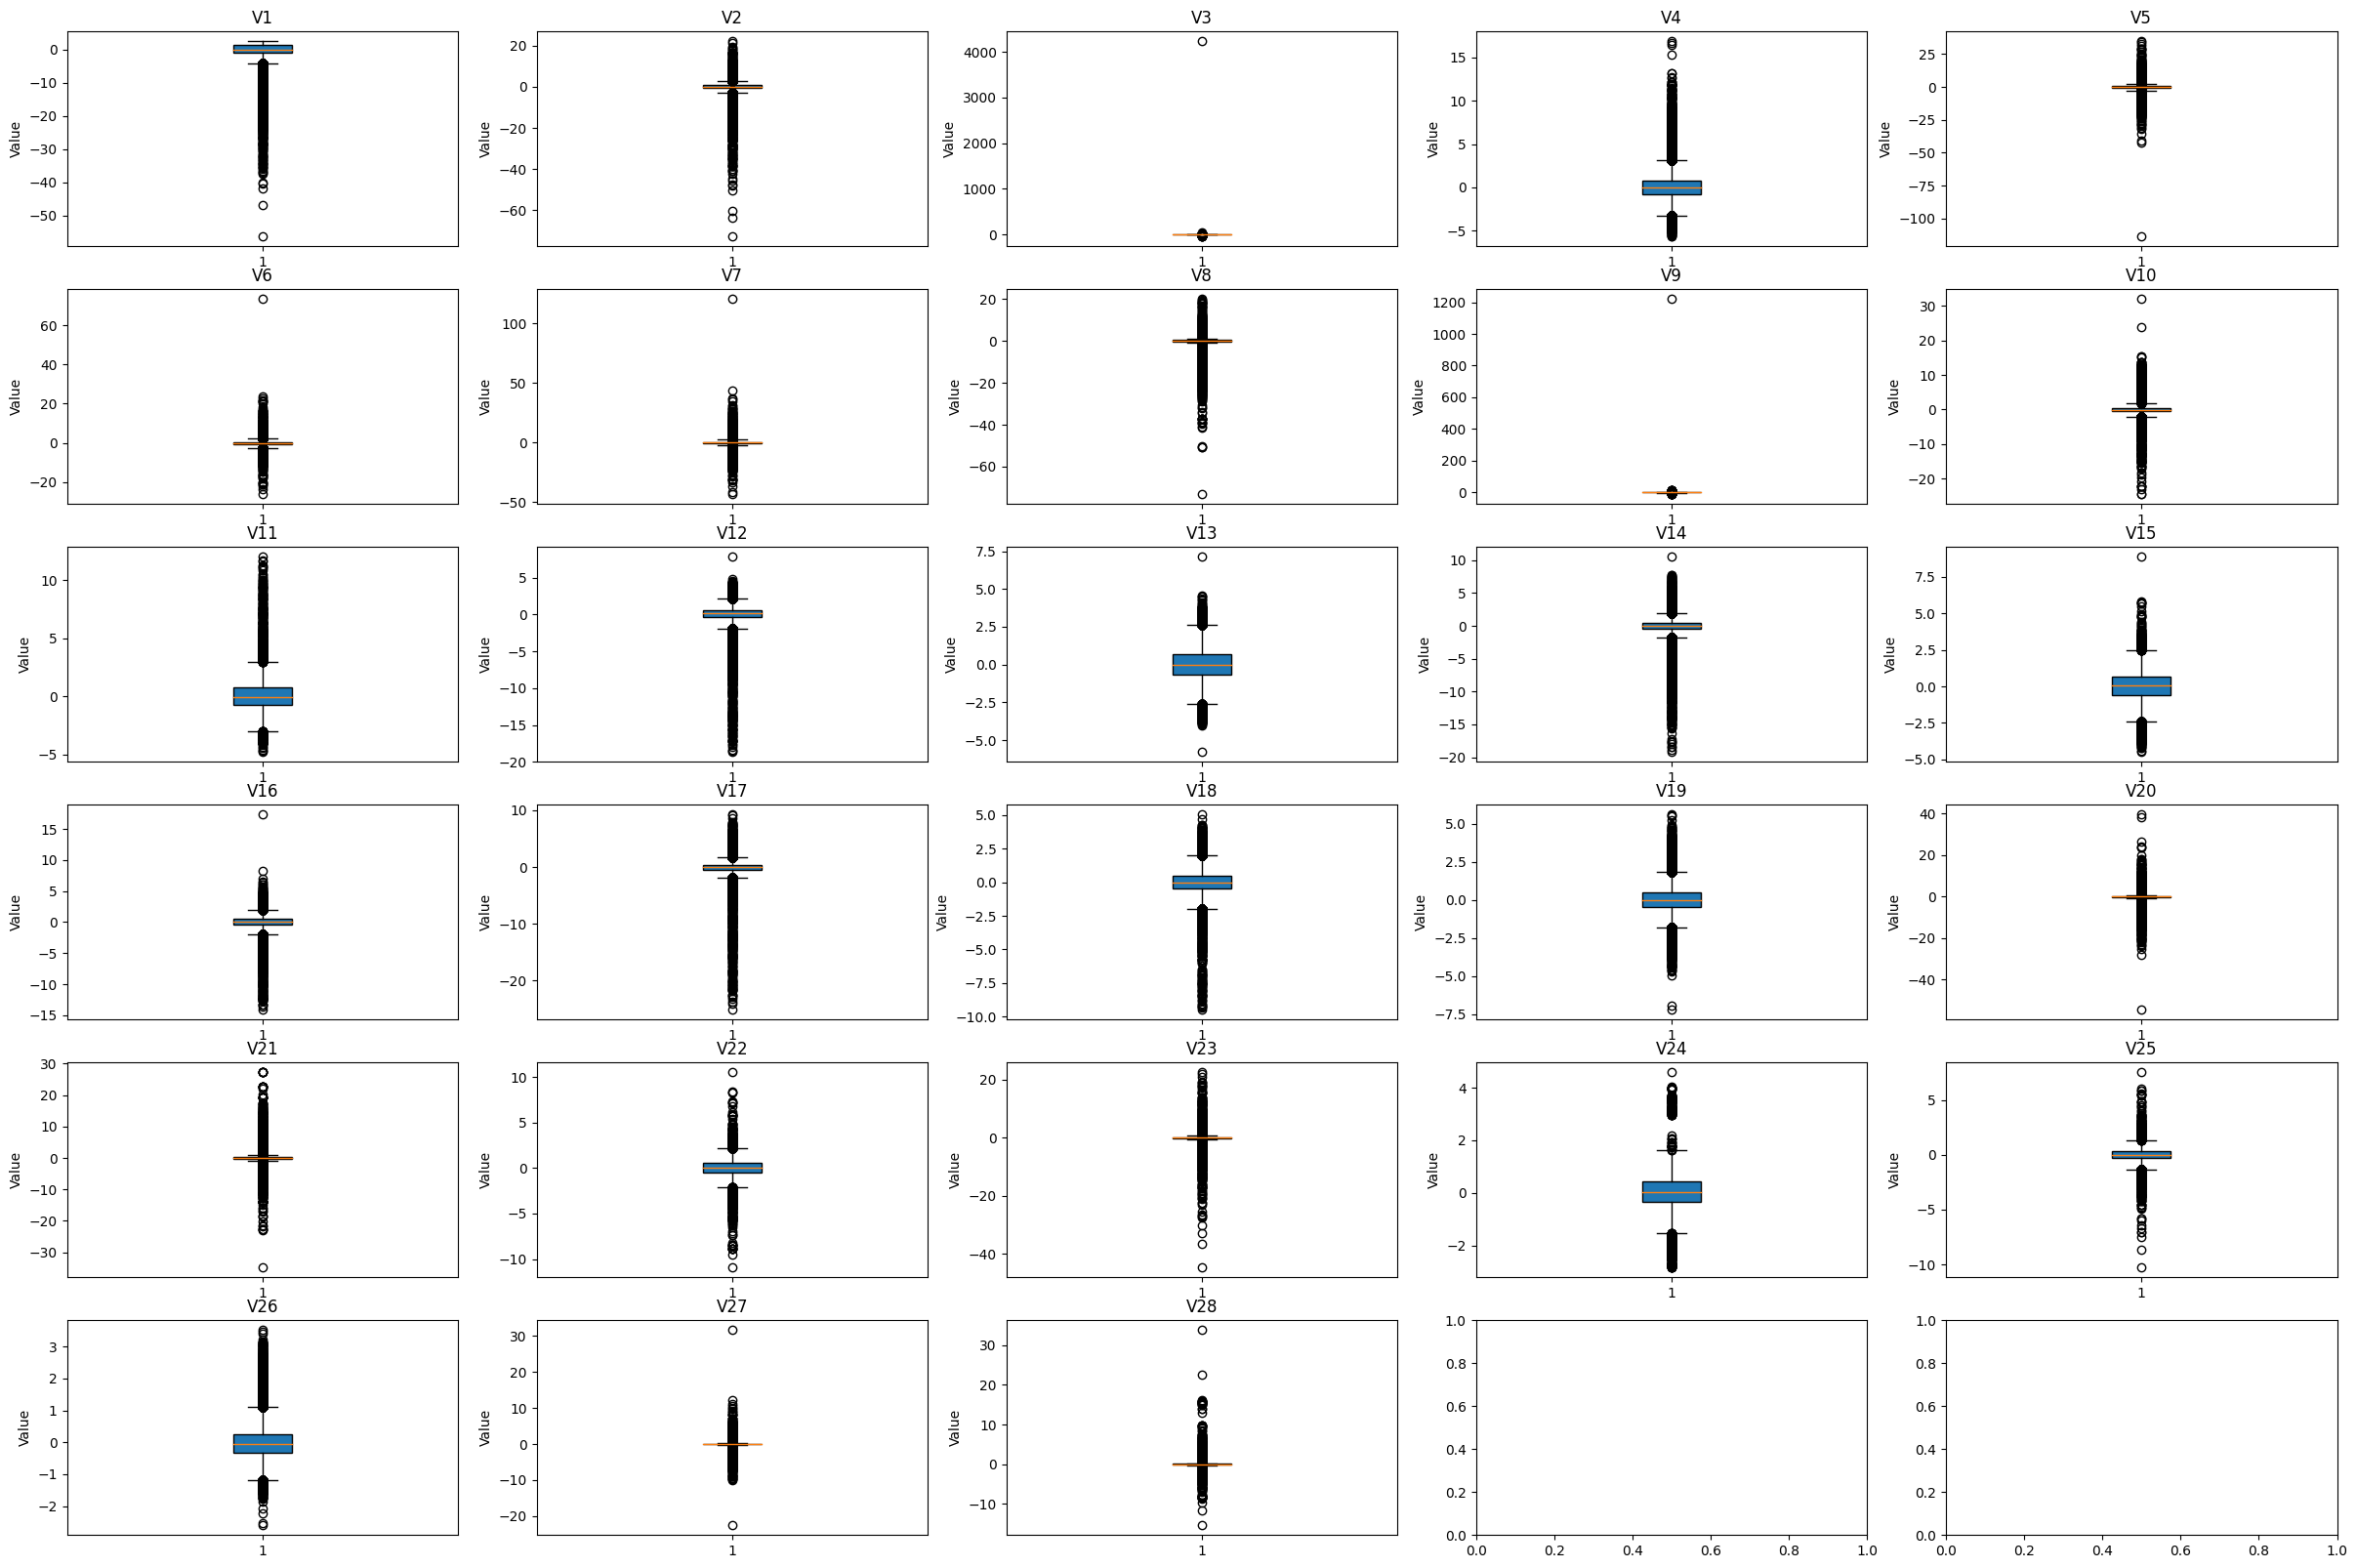

In [54]:
num_cols = 5

fig, axes = plt.subplots(6,num_cols,figsize=(30, 20))
axes = axes.flatten()

# Plot boxplots for each feature
for i, feature in enumerate(features):
    axes[i].boxplot(data[feature].dropna(), vert=True, patch_artist=True)
    axes[i].set_title(feature)
    axes[i].set_ylabel('Value')


<Axes: >

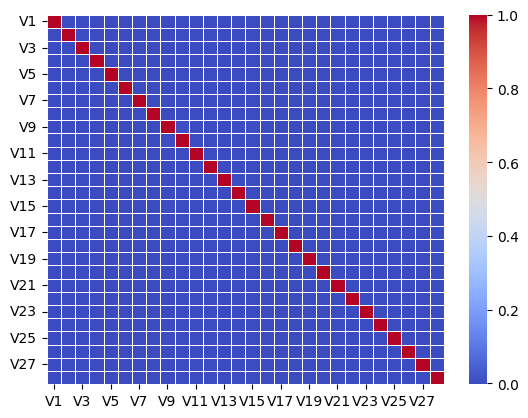

In [55]:
correlation_matrix = data[features].corr()
sns.heatmap(correlation_matrix,cmap='coolwarm', cbar='true', linewidths=0.5)

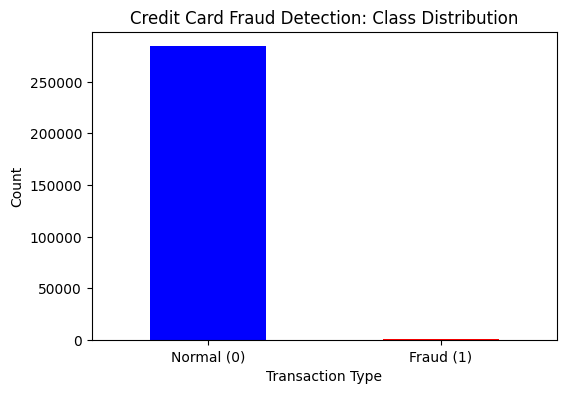

In [56]:
class_counts = data.iloc[:, 30].value_counts()

plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['blue', 'red'])

plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Credit Card Fraud Detection: Class Distribution")
plt.xticks(ticks=[0, 1], labels=["Normal (0)", "Fraud (1)"], rotation=0)

plt.show()


**Apply Knn classification model**

In [57]:
X=data.iloc[:, 1:29]
y=data['Class']


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)


KNeighborsClassifier()

In [60]:
# Make predictions on the test set
y_pred = knn.predict(X_test)


In [61]:
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))


print("classification report: \n")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

confusion matrix: 
[[56859     5]
 [   22    76]]
classification report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy: 0.9995


**Addition of Sampling techniques like Smote(ADASYN)**

In [62]:
from imblearn.over_sampling import ADASYN

# Applying ADASYN
adasyn = ADASYN(sampling_strategy='minority')
x_resampled, y_resampled = adasyn.fit_resample(X, y)
# Count outcome values after applying ADASYN
y_resampled.value_counts()


Class
0    284315
1    284300
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)

print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))



print("classification report: \n")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

In [63]:
# We want recall as high to minimize the false negative error because classifying a fraud transaction as normal is more important than classifying a normal transaction as fraud.

**Decision Tree Based Classification model**

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [66]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)


In [67]:
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))


print("classification report: \n")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

confusion matrix: 
[[56851    13]
 [   25    73]]
classification report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.74      0.79        98

    accuracy                           1.00     56962
   macro avg       0.92      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy: 0.9993


**Apply Random Forest classifier for more improved results**

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
y_pred = rf_classifier.predict(X_test)


In [ ]:
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))


print("classification report: \n")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

In [ ]:
#We can see that random forest is giving us the best results, be it recall or accuracy.